In [25]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import linregress

In [2]:
customer_df=pd.read_csv("resources/customer_data.csv")
customer_df

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,2,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,3,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,4,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,5,31,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,31,Female,19691,College,West,Regular,occasional,7075,Health,0,7
99996,99997,36,Male,17428,HighSchool,South,Regular,rare,6873,Health,0,5
99997,99998,29,Male,13222,College,West,Regular,frequent,5152,Clothing,0,5
99998,99999,31,Female,40093,Bachelor,West,Regular,frequent,16312,Health,1,5


In [3]:
customer_purchase_amount = customer_df["purchase_amount"]
customer_purchase_amount

0        18249
1         4557
2        11822
3         4098
4        19685
         ...  
99995     7075
99996     6873
99997     5152
99998    16312
99999     9426
Name: purchase_amount, Length: 100000, dtype: int64

In [4]:
customer_region = customer_df["region"]
customer_region

0         East
1         West
2         West
3        South
4        North
         ...  
99995     West
99996    South
99997     West
99998     West
99999     West
Name: region, Length: 100000, dtype: object

In [6]:
customer_id=customer_df["id"]

In [7]:
customer_age = customer_df["age"]
customer_age = pd.DataFrame(customer_age)

customer_age = pd.concat([customer_age, customer_id, customer_purchase_amount], axis=1, ignore_index=True) 
customer_age = customer_age.rename(columns={0:"age",1:"id",2:"purchase_amount"})
customer_age

,age,id,purchase_amount
0,27,1,18249
1,29,2,4557
2,37,3,11822
3,30,4,4098
4,31,5,19685
...,...,...,...
99995,31,99996,7075
99996,36,99997,6873
99997,29,99998,5152
99998,31,99999,16312


In [8]:
customer_income_purchase = customer_df[["income", "purchase_amount"]]
customer_income_purchase

,income,purchase_amount
0,40682,18249
1,15317,4557
2,38849,11822
3,11568,4098
4,46952,19685
...,...,...
99995,19691,7075
99996,17428,6873
99997,13222,5152
99998,40093,16312


In [9]:
print(customer_income_purchase.columns)

Index(['income', 'purchase_amount'], dtype='object')


In [10]:
x_values = customer_income_purchase["income"]
y_values = customer_income_purchase["purchase_amount"]

In [12]:
x_values.shape

(100000,)

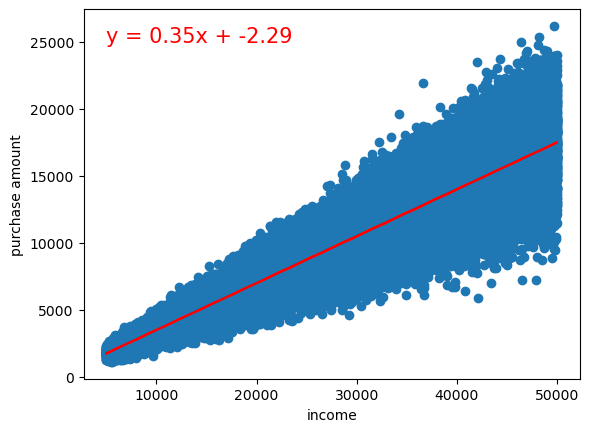

In [38]:
def create_scatter(df,x, y,xl,yla, coords = (0,0)):
    x_values = df[x]
    y_values = df[y]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,coords,fontsize=15,color="red")
    plt.xlabel(xl)
    plt.ylabel(yla)
    plt.show()

create_scatter(customer_income_purchase, "income", "purchase_amount","income","purchase amount", (5000,25000))

In [41]:
customer_df["income spent(%)"]

0        40682
1        15317
2        38849
3        11568
4        46952
         ...  
99995    19691
99996    17428
99997    13222
99998    40093
99999    22249
Name: income, Length: 100000, dtype: int64

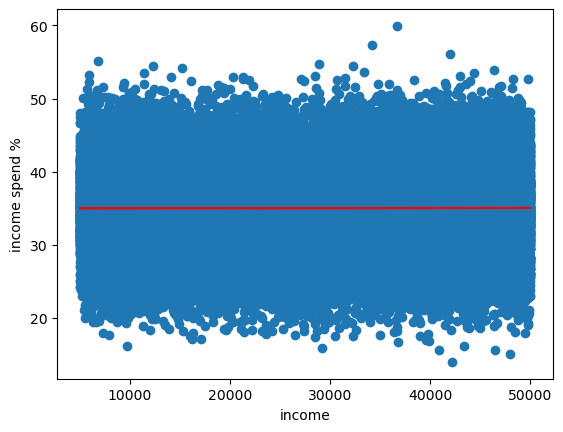

In [43]:
customer_df["income spent(%)"]=(customer_df["purchase_amount"]/customer_df["income"])*100
create_scatter(customer_df,"income","income spent(%)","income","income spend %")

In [ ]:
#Is there correlation between income and purchase amount?
-Yes there is positive correlation in the data, as customer income increases purchase amounts also increase, there are no outliers.

In [ ]:
#Is there correlation between income and income spend %?
-No there is no correlation in the data, customer income does not have an affect on what percent of their income they spend.